In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten, Reshape

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [4]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [5]:
X_poly

array([[1.423000e+01, 1.710000e+00, 2.430000e+00, ..., 1.536640e+01,
        4.174800e+03, 1.134225e+06],
       [1.320000e+01, 1.780000e+00, 2.140000e+00, ..., 1.156000e+01,
        3.570000e+03, 1.102500e+06],
       [1.316000e+01, 2.360000e+00, 2.670000e+00, ..., 1.004890e+01,
        3.756450e+03, 1.404225e+06],
       ...,
       [1.327000e+01, 4.280000e+00, 2.260000e+00, ..., 2.433600e+00,
        1.302600e+03, 6.972250e+05],
       [1.317000e+01, 2.590000e+00, 2.370000e+00, ..., 2.624400e+00,
        1.360800e+03, 7.056000e+05],
       [1.413000e+01, 4.100000e+00, 2.740000e+00, ..., 2.560000e+00,
        8.960000e+02, 3.136000e+05]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 104)
(36, 104)
(142,)
(36,)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

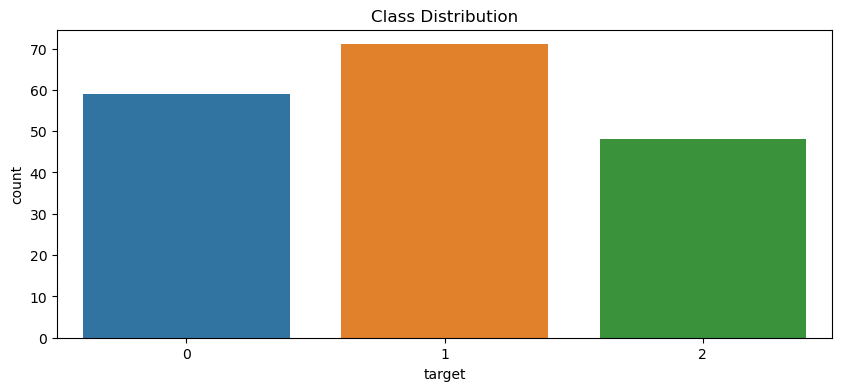

In [8]:
plt.figure(figsize=(10, 4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

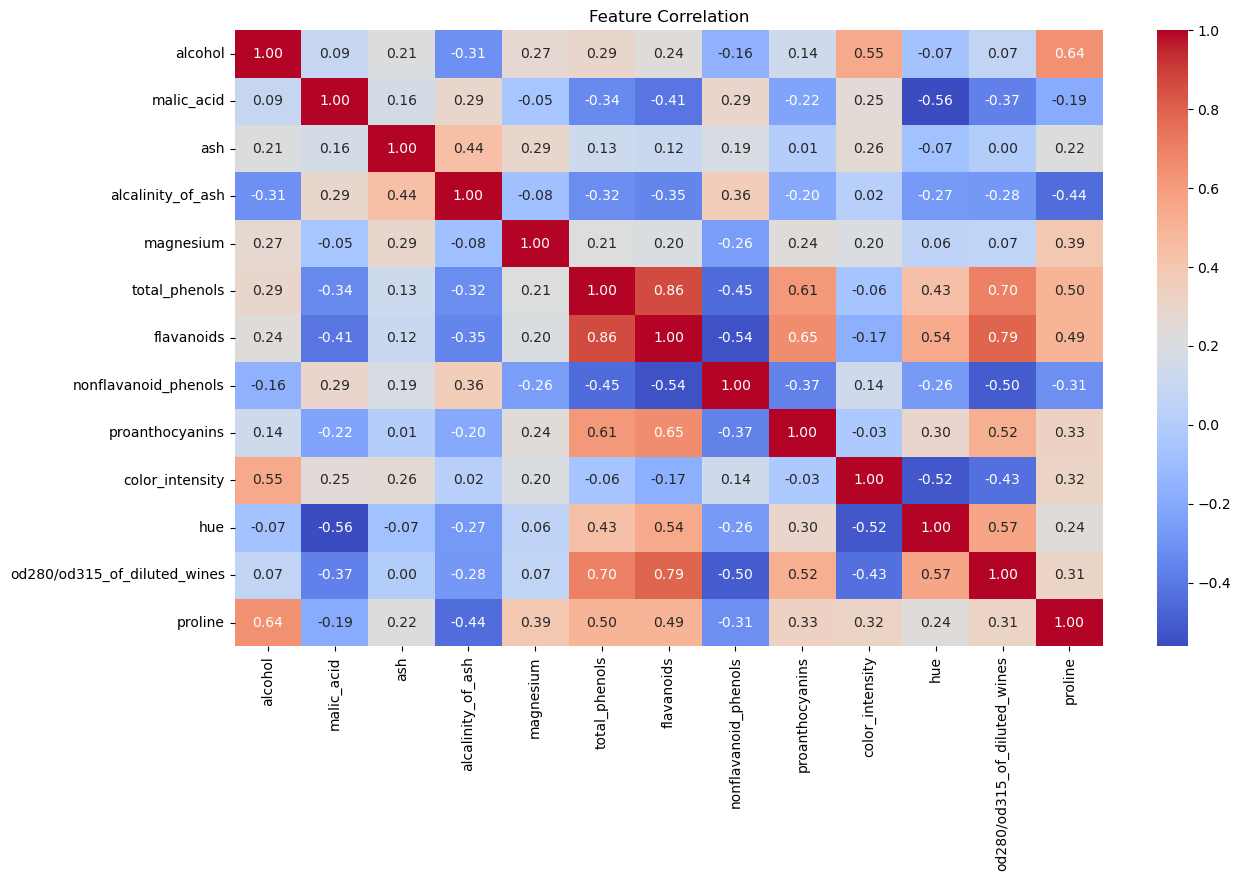

In [9]:
plt.figure(figsize=(14, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

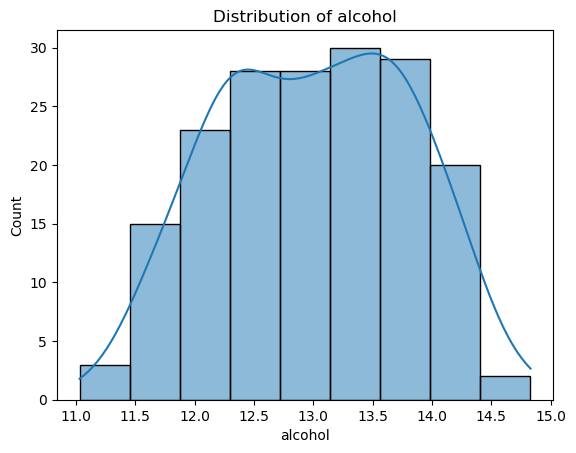

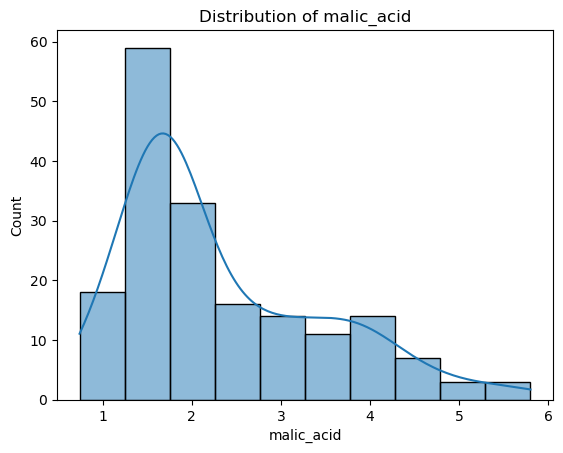

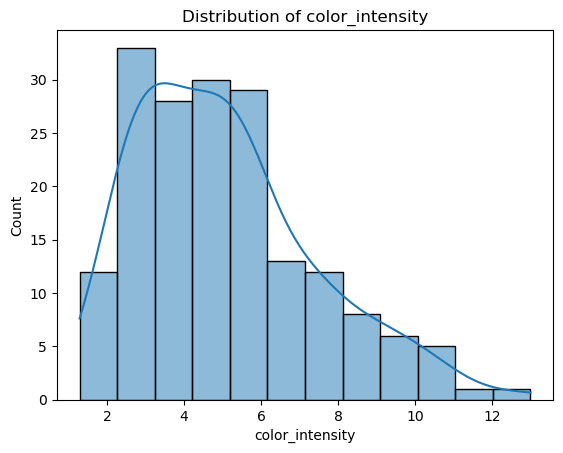

In [10]:
for col in ['alcohol', 'malic_acid', 'color_intensity']:
    plt.figure()
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

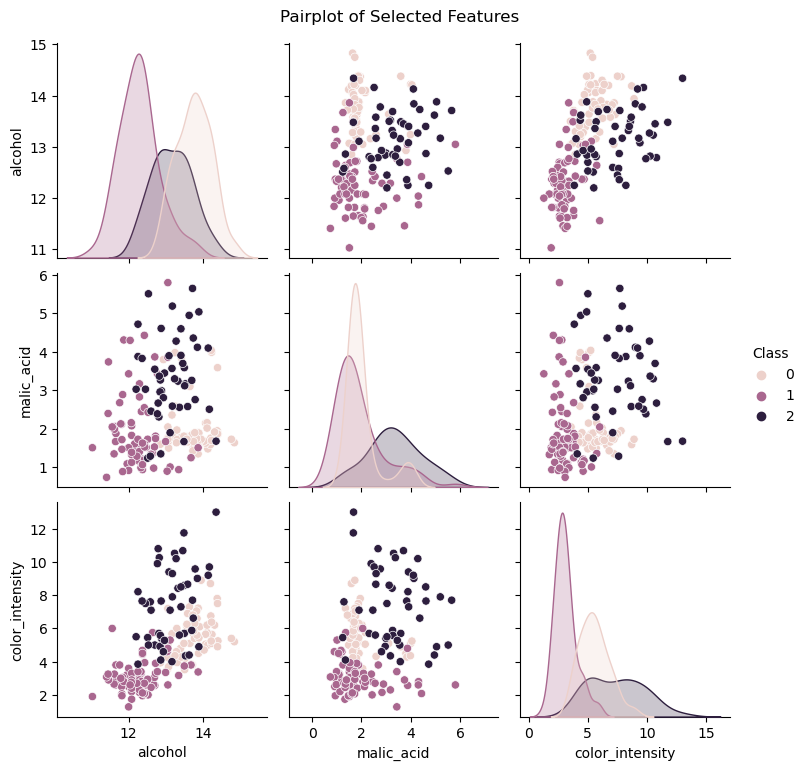

In [11]:
sns.pairplot(X[['alcohol', 'malic_acid', 'color_intensity']].assign(Class=y), hue='Class')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

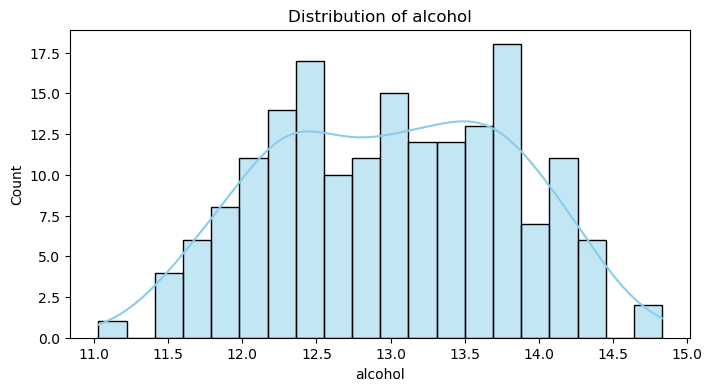

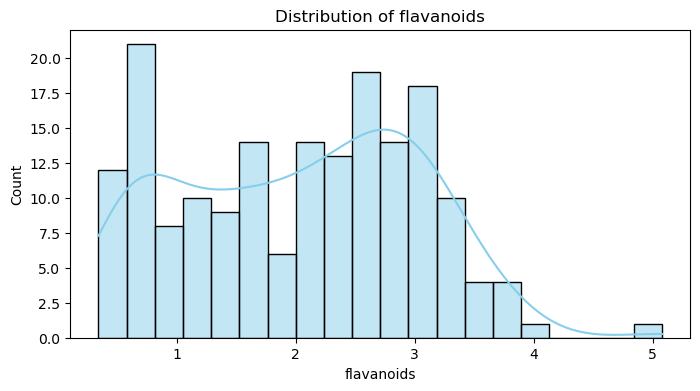

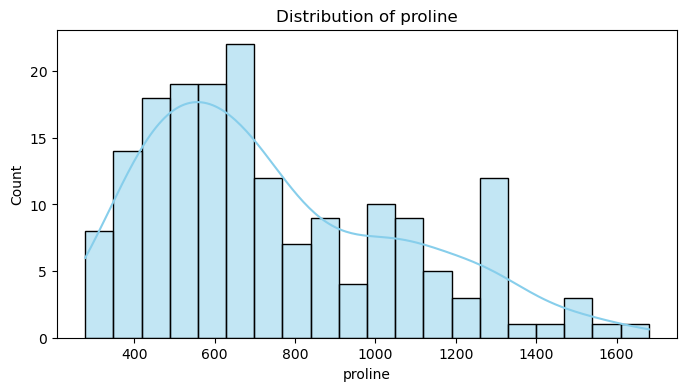

In [12]:
for feature in ['alcohol','flavanoids','proline']:
    plt.figure(figsize=(8,4))
    sns.histplot(X[feature],kde=True,bins=20,color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.show()

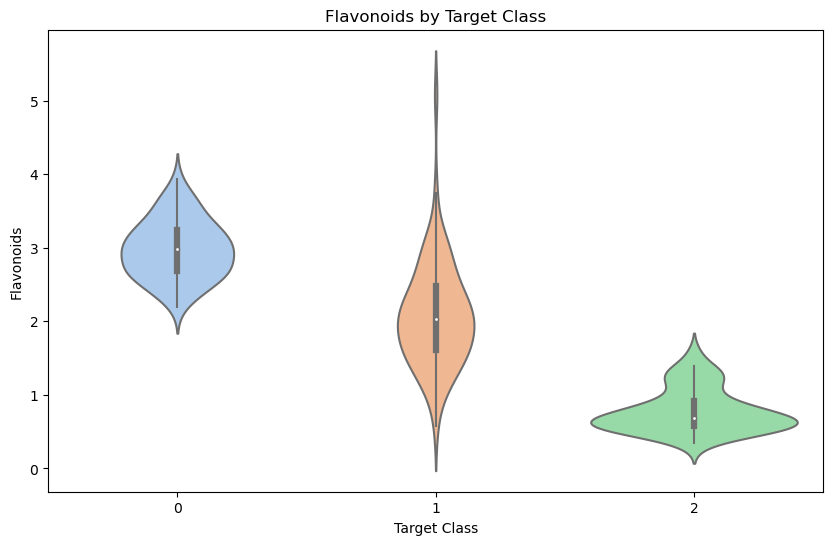

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x=y,y=X['flavanoids'],palette='pastel')
plt.title('Flavonoids by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Flavonoids')
plt.show()

In [14]:
ml_models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=10)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes", GaussianNB())
]

In [15]:
print("\n--- Machine Learning Model Results ---")
best_ml_model = None
best_ml_acc = 0
for name, model in ml_models:
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    if acc > best_ml_acc:
        best_ml_acc = acc
        best_ml_model = model
        best_ml_model_name = name
print(f"\nSelected Final ML Model: {best_ml_model_name} with Accuracy: {best_ml_acc:.4f}")


--- Machine Learning Model Results ---

Logistic Regression
Accuracy: 0.9167
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.87      0.93      0.90        14
           2       1.00      0.80      0.89        10

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36


Decision Tree
Accuracy: 0.9167
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.87      0.93      0.90        14
           2       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


Random Forest
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.

In [17]:
def build_mlp_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
def build_deep_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
def build_cnn_model():
    model = Sequential([
        Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
        Conv1D(32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
best_dl_acc = 0
final_dl_model = None
print("\n--- Deep Learning Model Results ---")
for name, builder in [
    ("MLP", build_mlp_model),
    ("Deep MLP", build_deep_model),
    ("1D CNN", build_cnn_model)
]:
    model = builder()
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)
    acc = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
    print(f"{name} Accuracy: {acc:.4f}")
    if acc > best_dl_acc:
        best_dl_acc = acc
        final_dl_model = model
        final_dl_model_name = name
print(f"\nSelected Final DL Model: {final_dl_model_name} with Accuracy: {best_dl_acc:.4f}")


--- Deep Learning Model Results ---
MLP Accuracy: 0.9444
Deep MLP Accuracy: 0.9167
1D CNN Accuracy: 0.9167

Selected Final DL Model: MLP with Accuracy: 0.9444


In [24]:
def ml_chatbot():
    print("\n🤖 ML Wine Classifier Bot")
    print("Please provide the following inputs:")
    user_input = []
    for feature in wine.feature_names:
        val = float(input(f"Enter value for {feature}: "))
        user_input.append(val)
    user_array = np.array(user_input).reshape(1, -1)
    user_array_poly = poly.transform(user_array)
    user_scaled = scaler.transform(user_array_poly)
    pred = best_ml_model.predict(user_scaled)
    print(f"\nPredicted wine class: {wine.target_names[pred[0]]}")

In [25]:
def dl_chatbot():
    print("\n🧠 DL Wine Classifier Bot")
    print("Please provide the following inputs:")
    user_input = []
    for feature in wine.feature_names:
        val = float(input(f"Enter value for {feature}: "))
        user_input.append(val)
    user_array = np.array(user_input).reshape(1, -1)
    user_array_poly = poly.transform(user_array)
    user_scaled = scaler.transform(user_array_poly)
    pred = final_dl_model.predict(user_scaled)
    pred_class = np.argmax(pred)
    print(f"\nPredicted wine class: {wine.target_names[pred_class]}")

In [26]:
ml_chatbot()


🤖 ML Wine Classifier Bot
Please provide the following inputs:
Enter value for alcohol: 13.5
Enter value for malic_acid: 2.1
Enter value for ash: 2.3
Enter value for alcalinity_of_ash: 16.0
Enter value for magnesium: 105
Enter value for total_phenols: 2.5
Enter value for flavanoids: 2.2
Enter value for nonflavanoid_phenols: 0.3
Enter value for proanthocyanins: 1.9
Enter value for color_intensity: 4.7
Enter value for hue: 1.05
Enter value for od280/od315_of_diluted_wines: 3.1
Enter value for proline: 1050

Predicted wine class: class_0


In [27]:
dl_chatbot()


🧠 DL Wine Classifier Bot
Please provide the following inputs:
Enter value for alcohol: 13.5
Enter value for malic_acid: 2.1
Enter value for ash: 2.3
Enter value for alcalinity_of_ash: 16.0
Enter value for magnesium: 105
Enter value for total_phenols: 2.5
Enter value for flavanoids: 2.2
Enter value for nonflavanoid_phenols: 0.3
Enter value for proanthocyanins: 1.9
Enter value for color_intensity: 4.7
Enter value for hue: 1.05
Enter value for od280/od315_of_diluted_wines: 3.1
Enter value for proline: 1050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Predicted wine class: class_0
